### Run with conduino probes and profiles, no dye

800 g of salt into bucket 1

f=0.70 s^-1

Probes K and A near canyons heads


In [1]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
rho_bucket1 = 1.0325

Probes A upstream and K downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':| K|
|'ch2': |A|
|'ch3':|38 profiler|



In [4]:
def dens_K(read):
    rho_K = 0.997645 + 0.004937*read + 0.006870*(read**2) - 0.000332*(read**3)
    return(rho_K)

def dens_A(read):
    rho_A = 0.997590 + 0.006686*read + 0.001903*(read**2) + 0.000142*(read**3)
    return(rho_A)

def dens_38(read):
    rho_38 = 0.998598 -0.006193*read + 0.050676*(read**2)-0.018454*(read**3 ) # change this relation
    return(rho_38)

def plot_uprofile(ax):
    ax.axvline(16.8, color='0.8', linestyle=':')
    ax.axvline(50.0, color='0.8', linestyle=':')
        

### Initial profile (right after filling)

In [5]:
filepath = '../../exp_14feb19/while_filling.mat'
print(filepath)
mat = sio.loadmat(filepath, squeeze_me=True)
PK = mat['ch1']
PA = mat['ch2']
samples_14 = mat['nSamples']
fill_K_14 = dens_K(PK)
fill_A_14 = dens_A(PA)
time_14 = mat['time']

../../exp_14feb19/while_filling.mat


../../exp_16feb19/profile2.mat


Text(0.5,0,'time / s')

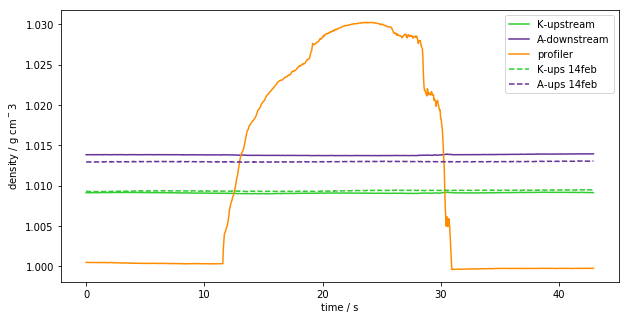

In [6]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

labels = ['K-upstream','A-downstream','profiler']
colors = ['limegreen','rebeccapurple','darkorange']

filepath = '../../exp_16feb19/profile2.mat'
print(filepath)
    
mat = sio.loadmat(filepath, squeeze_me=True)
PK = mat['ch1']
PA = mat['ch2']
P38 = mat['ch3']
samples = mat['nSamples']
fill_K = dens_K(PK)
fill_A = dens_A(PA)
fill_38 = dens_38(P38)

time = mat['time']
ax0.plot(time,fill_K,'-' ,label=labels[0], color=colors[0])
ax0.plot(time,fill_A,'-', label=labels[1], color=colors[1])
ax0.plot(time,fill_38,'-', label=labels[2], color=colors[2])
ax0.plot(time,fill_K_14,'--' ,label='K-ups 14feb', color=colors[0])
ax0.plot(time,fill_A_14,'--', label='A-ups 14feb', color=colors[1])

ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel(r'density / g cm$^-3$')
ax0.set_xlabel('time / s')


### Profile after 1.5 hours 

(Mowgli had some problems and I ended up disturbing the table quite a bit to wake him up)

In [7]:
filepath = '../../exp_14feb19/ini_read.mat'
print(filepath)
mat = sio.loadmat(filepath, squeeze_me=True)
PK = mat['ch1']
PA = mat['ch2']
ini_K_14 = dens_K(PK)
ini_A_14 = dens_A(PA)
time_ini_14 = mat['time']

../../exp_14feb19/ini_read.mat


../../exp_16feb19/profile3.mat


Text(0.5,0,'time / s')

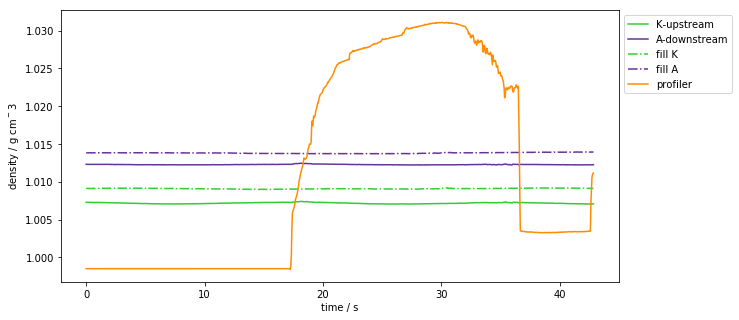

In [8]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

labels = ['K-upstream','A-downstream','profiler']
colors = ['limegreen','rebeccapurple','darkorange']

filepath = '../../exp_16feb19/profile3.mat'
print(filepath)
    
mat = sio.loadmat(filepath, squeeze_me=True)
PK3 = mat['ch1']
PA3 = mat['ch2']
P383 = mat['ch3']
samples3 = mat['nSamples']
fill_K3 = dens_K(PK3)
fill_A3 = dens_A(PA3)
fill_383 = dens_38(P383)

time = mat['time']
ax0.plot(time,fill_K3,'-' ,label=labels[0], color=colors[0])
ax0.plot(time,fill_A3,'-', label=labels[1], color=colors[1])
ax0.plot(time,fill_K,'-.' ,label='fill K', color=colors[0])
ax0.plot(time,fill_A,'-.', label='fill A', color=colors[1])
ax0.plot(time,fill_383,'-', label=labels[2], color=colors[2])
#ax0.plot(time,ini_K_14,'--' ,label='ini K 14feb', color=colors[0])
#ax0.plot(time,ini_A_14,'--', label='ini A 14feb', color=colors[1])

ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel(r'density / g cm$^-3$')
ax0.set_xlabel('time / s')


### Casts

553 701


Text(0.5,0,'sample number')

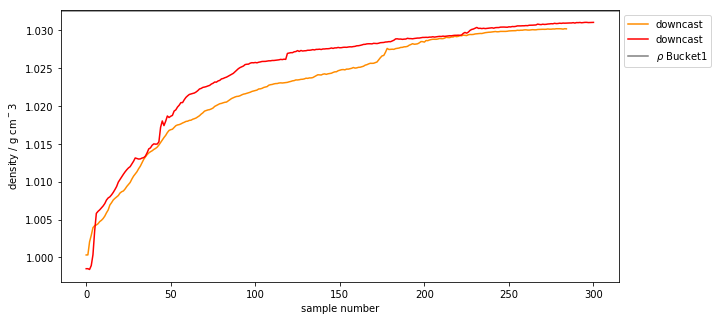

In [9]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

ind_max = np.argmax(fill_38)
ind_max3 = np.argmax(fill_383)

print(ind_max, ind_max3)

ax0.plot((np.arange(samples)[268:ind_max])-268,fill_38[268:ind_max],'-', label='downcast', color=colors[2])
ax0.plot((np.arange(samples3)[400:ind_max3])-400,fill_383[400:ind_max3],'-', label='downcast', color='red')

ax0.axhline(rho_bucket1, label=r'$\rho$ Bucket1', color='0.5')


ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel(r'density / g cm$^-3$')
ax0.set_xlabel('sample number')

553 701


Text(0.5,0,'sample number')

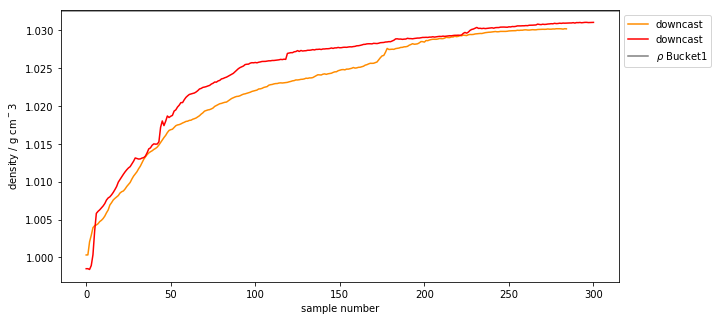

In [10]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

ind_max = np.argmax(fill_38)
ind_max3 = np.argmax(fill_383)

print(ind_max, ind_max3)

ax0.plot((np.arange(samples)[268:ind_max])-268,fill_38[268:ind_max],'-', label='downcast', color=colors[2])
ax0.plot((np.arange(samples3)[400:ind_max3])-400,fill_383[400:ind_max3],'-', label='downcast', color='red')

ax0.axhline(rho_bucket1, label=r'$\rho$ Bucket1', color='0.5')


ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel(r'density / g cm$^-3$')
ax0.set_xlabel('sample number')